In [1]:
import  numpy as np
from matplotlib import pyplot as plt

In [104]:
file = open("tempwithbright.txt")
data = file.read()

In [105]:
x = []
y = []
for line in data.split("\n"):
    x.append(np.float(line.split(",")[0]))
    y.append(np.float(line.split(",")[1]))

In [106]:
x = np.array(x[0:150])
y = np.array(y[0:150])

In [107]:
xy  = np.concatenate(([x],[y]),0)

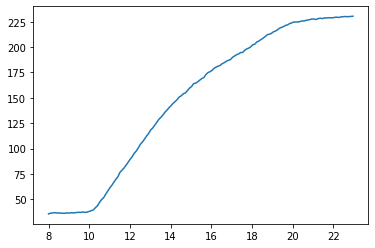

In [108]:
plt.plot(xy[0],xy[1])

In [109]:
def linear(x,y):
    xybar = np.average( x*y)
    xbar = np.average(x)
    ybar = np.average(y)
    x2bar = np.average(np.power(x,2))
    k = (xybar -xbar*ybar)/(x2bar - xbar**2)
    b = ybar - k*xbar
    return k,b

In [110]:
def loss(x,y):
    k,b = linear(x,y)
    yy = k*x+b
    l = np.average(np.power(y-yy,2))
    return  l

In [111]:
xy = np.sort(xy,1)

In [112]:
startlinearloss = []
endlinearloss = []
for i in range(120):
    startlinearloss.append([x[i+1],loss(x[0:i+2],y[0:i+2])])
    endlinearloss.append([x[150-i-2], loss(x[150 - i -2:150],y[150 -i -2:150])])
    # print(i,200-i-2,x[200-i-2],loss(x[200-i-2:200],y[200-i-2:200]))

150

In [114]:
startlinearloss = np.array(startlinearloss)
endlinearloss = np.array(endlinearloss)

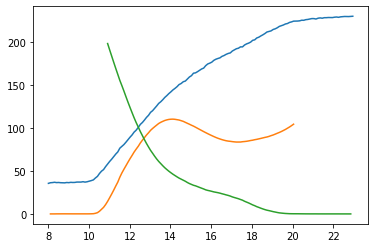

In [115]:
plt.plot(x[0:150],y[0:150],startlinearloss[:,0],startlinearloss[:,1],endlinearloss[:,0],endlinearloss[:,1])

In [137]:
startlinearlossdiff = startlinearloss[0:50] +startlinearloss[1:51]+startlinearloss[2:52]+startlinearloss[3:53]+startlinearloss[4:54]-10*startlinearloss[5:55]+startlinearloss[6:56]+startlinearloss[7:57]+startlinearloss[8:58]+startlinearloss[9:59]

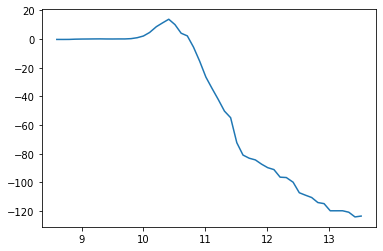

In [139]:
plt.plot(startlinearloss[5:55,0],startlinearlossdiff[:,1])

In [116]:
endlinearlossdiff =  endlinearloss[0:50] +endlinearloss[1:51]+endlinearloss[2:52]+endlinearloss[3:53]+endlinearloss[4:54]-10*endlinearloss[5:55]+endlinearloss[6:56]+endlinearloss[7:57]+endlinearloss[8:58]+endlinearloss[9:59]

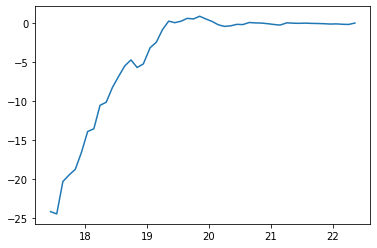

In [134]:
plt.plot(endlinearloss[5:55,0],endlinearlossdiff[:,1])